# **Chess FP-Growth-**

Group Members:
1.Mohammad Nurul Abrar (2018-1-60-139)
2.MD Maruf (2018-1-60-140)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install pyfpgrowth

     |████████████████████████████████| 1.6 MB 4.1 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5504 sha256=5e1ac46dc94f21de31b908b09e4a86ef7990f950643510d6b9ea0d2c110d7804
  Stored in directory: /root/.cache/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


In [ ]:
%pip install numpy

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 4.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import pyfpgrowth
import os

In [ ]:
import pandas as pd
import numpy as np
chessdata= pd.read_csv("/content/gdrive/MyDrive/477project/Chess.csv", header = None) 
chessdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74
1,1,3,5,7,9,12,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74
2,1,3,5,7,9,12,13,16,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74
3,1,3,5,7,9,11,13,15,17,20,21,23,25,27,29,31,34,36,38,40,42,44,47,48,50,52,54,56,58,60,62,64,66,68,70,72,74
4,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,51,52,54,56,58,60,62,64,66,68,70,72,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,51,52,54,56,58,61,62,64,67,68,70,73,74
3192,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74
3193,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,31,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74
3194,2,4,5,8,9,11,13,16,17,19,21,23,26,27,30,33,35,36,38,40,42,44,46,48,51,52,54,56,58,61,62,64,67,68,71,73,74


In [ ]:
chessdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3196 non-null   int64
 1   1       3196 non-null   int64
 2   2       3196 non-null   int64
 3   3       3196 non-null   int64
 4   4       3196 non-null   int64
 5   5       3196 non-null   int64
 6   6       3196 non-null   int64
 7   7       3196 non-null   int64
 8   8       3196 non-null   int64
 9   9       3196 non-null   int64
 10  10      3196 non-null   int64
 11  11      3196 non-null   int64
 12  12      3196 non-null   int64
 13  13      3196 non-null   int64
 14  14      3196 non-null   int64
 15  15      3196 non-null   int64
 16  16      3196 non-null   int64
 17  17      3196 non-null   int64
 18  18      3196 non-null   int64
 19  19      3196 non-null   int64
 20  20      3196 non-null   int64
 21  21      3196 non-null   int64
 22  22      3196 non-null   int64
 23  23      3196 

In [ ]:
chessdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64

In [ ]:
chess_transactions= []
for sublist in chessdata.values.tolist():
    clean_sublist=[item for item in sublist if item is not np.nan]
    chess_transactions.append(clean_sublist)
print(chess_transactions)
for iteration, item in enumerate(chess_transactions):
  iteration
print(iteration)

[[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 12, 13, 16, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 47, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 51, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 51, 52, 54, 56, 58, 60, 63, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 47, 48, 51, 52, 54, 56, 58, 60, 62, 64, 66, 6

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
chesstr = TransactionEncoder()
chesste_ary = chesstr.fit(chess_transactions).transform(chess_transactions)
chessds = pd.DataFrame(chesste_ary, columns=chesstr.columns_)
chessds 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
1,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
2,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
3,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
4,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False
3192,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False
3193,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False
3194,False,True,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,Tr

In [ ]:
# 0 equal false
chessds[0]=bool(False)
chessds

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,0
0,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False
1,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False
2,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False
3,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False
4,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False
3192,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False
3193,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False
3194,False,True,False,True,True,False,False,True,True,False,True,False,True,False,False,True,Tru

In [ ]:
import time
from mlxtend.frequent_patterns import fpgrowth

cthreshold = 1
chess_time = []
cthreshold_value = []

for i in range(0,7):
  start = time.time()
  rules=fpgrowth(chessds, min_support=cthreshold, use_colnames=True)
  end = time.time()
  chess_time.append(end-start)
  cthreshold_value.append(cthreshold)
  cthreshold = cthreshold - 0.1
  print(rules)

Empty DataFrame
Columns: [support, itemsets]
Index: []
      support         itemsets
0    0.999687             (58)
1    0.996558             (52)
2    0.995307             (29)
3    0.991865             (40)
4    0.985294             (60)
..        ...              ...
617  0.903630      (34, 58, 5)
618  0.902691      (34, 29, 5)
619  0.901126      (34, 52, 5)
620  0.902378  (34, 29, 58, 5)
621  0.900814  (34, 58, 52, 5)

[622 rows x 2 columns]
       support              itemsets
0     0.999687                  (58)
1     0.996558                  (52)
2     0.995307                  (29)
3     0.991865                  (40)
4     0.985294                  (60)
...        ...                   ...
8222  0.805382      (40, 58, 52, 44)
8223  0.804130      (40, 58, 44, 29)
8224  0.801001      (40, 52, 29, 44)
8225  0.800688  (40, 44, 52, 58, 29)
8226  0.802253          (58, 60, 44)

[8227 rows x 2 columns]
        support                     itemsets
0      0.999687                    

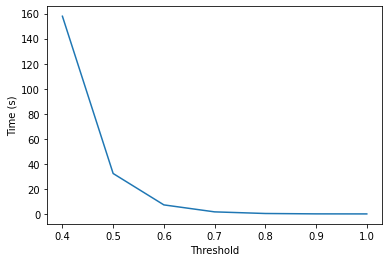

In [ ]:
from matplotlib import pyplot as plt

plt.plot( cthreshold_value, chess_time,label='Chess dataset')
plt.xlabel("Threshold")
plt.ylabel("Time (s)")
plt.savefig("chessfp.jpg")